[Keras](https://keras.io/)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from IPython.display import Image

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [3]:
# Directory to dataset in drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
model = tf.keras.applications.MobileNet()

17225924/17225924 [==============================] - 3s 0us/step


In [4]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [8]:
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    print(img_array.shape)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    print(img_array_expanded_dims.shape)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

# https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a
# List of all 1000 categories from ImageNet Competition

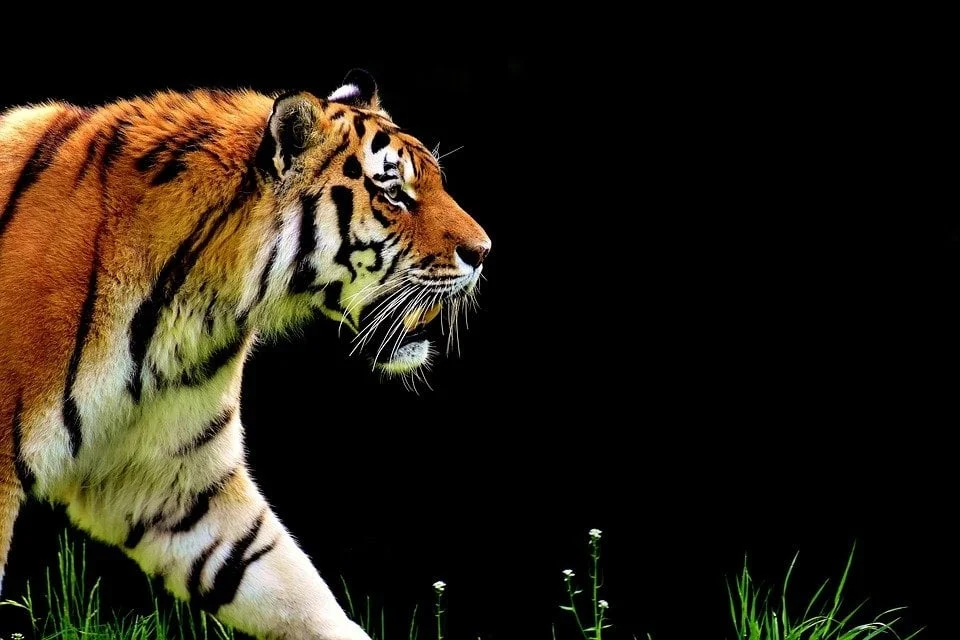

In [6]:
Image(filename='input_image-1.png', width=300,height=200)

In [9]:
preprocessed_image = prepare_image('input_image-1.png')
predictions = model.predict(preprocessed_image)

(224, 224, 3)
(1, 224, 224, 3)
1/1 [==============================] - 7s 7s/step


In [10]:
results = imagenet_utils.decode_predictions(predictions)
results

35363/35363 [==============================] - 0s 2us/step


[[('n02129604', 'tiger', 0.84181565),
  ('n02123159', 'tiger_cat', 0.15611428),
  ('n02127052', 'lynx', 0.001142274),
  ('n02128925', 'jaguar', 0.00035291602),
  ('n02123045', 'tabby', 0.00016124023)]]

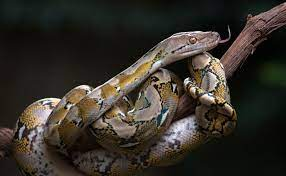

In [11]:
Image(filename='python.jpeg', width=300,height=200)

In [12]:
preprocessed_image = prepare_image('python.jpeg')
predictions = model.predict(preprocessed_image)

(224, 224, 3)
(1, 224, 224, 3)
1/1 [==============================] - 0s 112ms/step


In [13]:
results = imagenet_utils.decode_predictions(predictions)
results

[[('n01744401', 'rock_python', 0.59181166),
  ('n01742172', 'boa_constrictor', 0.17150027),
  ('n01753488', 'horned_viper', 0.06554047),
  ('n01740131', 'night_snake', 0.03936239),
  ('n01739381', 'vine_snake', 0.036388744)]]